In [ ]:
# Import PyTorch
import torch

# We use torchvision to get our dataset and useful image transformations
import torchvision
import torchvision.transforms as transforms

# Import PyTorch's optimization libary and nn
# nn is used as the basic building block for our Network graphs
import torch.optim as optim
import torch.nn as nn

# Are we using our GPU?
print("GPU available: {}".format(torch.cuda.is_available()))

GPU available: False


importing and unzipping the dataset


In [ ]:
from google.colab import files

# Upload the .zip file
uploaded = files.upload()

# Extract the contents of the .zip file
import zipfile
import io

with zipfile.ZipFile("/content/brain_tumor_dataset.zip", 'r') as zip_ref:
    zip_ref.extractall('/content/dataset')
    zip_ref.close()

Saving brain_tumor_dataset.zip to brain_tumor_dataset.zip


In [ ]:
import tensorflow as tf
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
import os

In [ ]:
data_dir = '/content/dataset/brain_tumor_dataset'
os.listdir(data_dir)

['yes', 'no']

In [ ]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 253 files belonging to 2 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()


plotting a batch of both yes and no classes ( 1=yes , 0
=no)

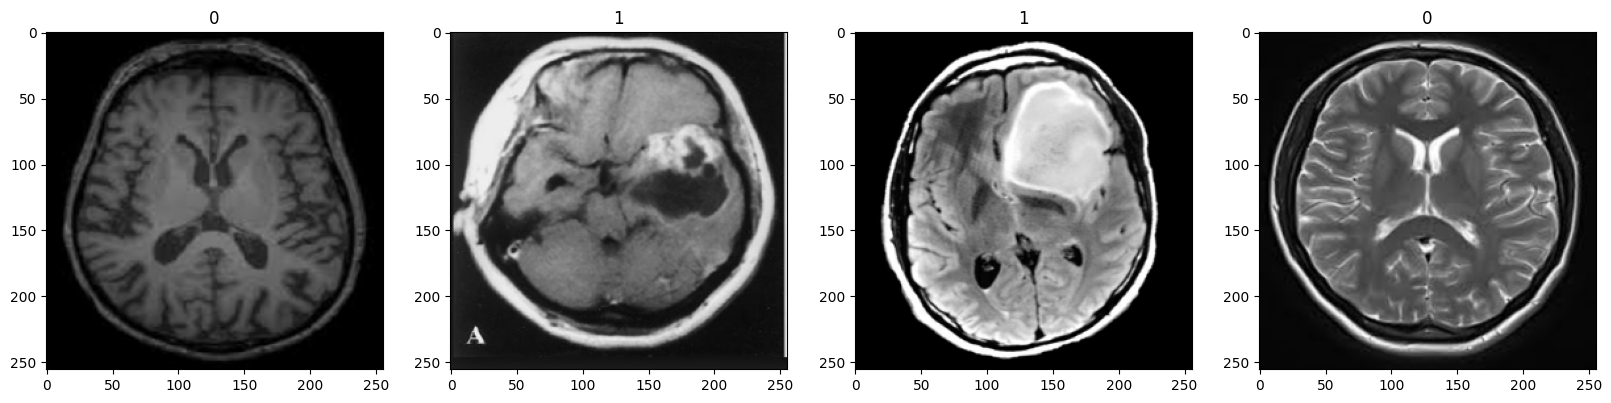

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

normalizing data

In [ ]:
data = data.map(lambda x,y: (x/255, y))
scaled_iterator=data.as_numpy_iterator().next()

creating train and validation and test data

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.15)
test_size = int(len(data)*.15)

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout , SeparableConv2D, Add, Input
from tensorflow.keras import regularizers

loss and accuracy

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

transfer learning

resnet-18

In [ ]:
import tensorflow as tf

resnet_model = tf.keras.applications.ResNet18(weights='imagenet', include_top=False)


for layer in resnet_model.layers:
    layer.trainable = False

resnet_model.summary()

In [ ]:
x = GlobalAveragePooling2D()(resnet_model.output)
x = Dense(256, activation='relu')(x)
output = Dense(2, activation='softmax')(x)

model_resnet = Model(inputs=resnet_model.input, outputs=output)

In [ ]:
model_resnet.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

history_resnet = model_resnet.fit(train, epochs=30, validation_data=val)

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
resnet_predictions = model_resnet.predict(test)
resnet_pred_labels = np.argmax(resnet_predictions, axis=1)
resnet_true_labels = np.argmax(test, axis=1)

resnet_accuracy = accuracy_score(resnet_true_labels, resnet_pred_labels)

resnet_confusion = confusion_matrix(resnet_true_labels, resnet_pred_labels)

print("ResNet-18 Accuracy:", resnet_accuracy)
print("ResNet-18 Confusion Matrix:")
print(resnet_confusion)


squeeze net

In [ ]:
import tensorflow as tf

squeezenet_model = tf.keras.applications.SqueezeNet(weights='imagenet', include_top=False)

for layer in squeezenet_model.layers:
    layer.trainable = False

squeezenet_model.summary()

In [ ]:
x = GlobalAveragePooling2D()(squeezenet_model.output)
x = Dense(256, activation='relu')(x)
output = Dense(2, activation='softmax')(x)

model_squeezenet = Model(inputs=squeezenet_model.input, outputs=output)

In [ ]:
model_squeezenet.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

history_squeezenet = model_squeezenet.fit(train, epochs=30, validation_data=val)

In [ ]:
squeezenet_predictions = model_squeezenet.predict(test)
squeezenet_pred_labels = np.argmax(squeezenet_predictions, axis=1)
squeezenet_true_labels = np.argmax(test, axis=1)

squeezenet_accuracy = accuracy_score(squeezenet_true_labels, squeezenet_pred_labels)

squeezenet_confusion = confusion_matrix(squeezenet_true_labels, squeezenet_pred_labels)

print("SqueezeNet Accuracy:", squeezenet_accuracy)
print("SqueezeNet Confusion Matrix:")
print(squeezenet_confusion)